<a href="https://colab.research.google.com/github/DarksterTwilight/Simple_GAN_fastion_mnist/blob/main/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing Dependencies 

In [1]:
!pip install tensorflow tensorflow-gpu matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 22 kB/s 
     |████████████████████████████████| 578.1 MB 8.8 kB/s 
     |████████████████████████████████| 578.1 MB 7.5 kB/s 
     |████████████████████████████████| 511.8 MB 26 kB/s 


In [2]:
!pip install tensorflow-datasets ipwedgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement ipwedgets (from versions: none)
ERROR: No matching distribution found for ipwedgets


In [3]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)
  

In [4]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
#Bringng in tensorflow datasets for fashion mnist
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [6]:
ds = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incomplete42HSHL/fashion_mnist-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incomplete42HSHL/fashion_mnist-test.tfrecord*...:   0%|   …

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [7]:
ds.as_numpy_iterator().next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

## Viz Data and Build Dataset

In [8]:
# Do some data transformation
import numpy as np

In [9]:
# Set up connection aka iterator
dataiterator = ds.as_numpy_iterator()

In [10]:
# Getting data out of pipeline
print(dataiterator.next()['image'].shape)
# Reshapping 
print(np.squeeze(dataiterator.next()['image']).shape)

(28, 28, 1)
(28, 28)


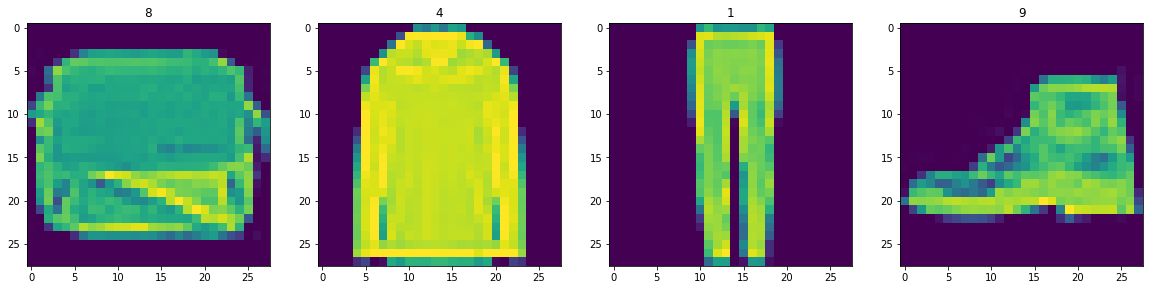

In [11]:
#Set up subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
  batch = dataiterator.next()
  ax[idx].imshow(np.squeeze(batch['image']))
  ax[idx].title.set_text(batch['label'])

In [12]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f694834bca0>,
      dtype=object)

In [13]:
# Sacale and return image only
def scale_image(data):
  image = data['image']
  return image/255

In [14]:
# map
# cache
# shuffle
# batch
# prefetch

ds = tfds.load('fashion_mnist', split='train')
ds = ds.map(scale_image)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

In [15]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

## Build Neural Network

### Import Modelling Components

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

### Build Generator

In [17]:
def build_generator():
  model = Sequential()
  # Takes in random values and reshape it into 7x7x128
  # Begaining of the the generator image
  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  #Up smapling block 1
  model.add(UpSampling2D())
  # UpSampling the input from 7x7x128 to 14x14x128
  # this is done vai dublicating hence this layer does not have any parameter
  model.add(Conv2D(128,5,padding ='same'))
  # condensing the information
  model.add(LeakyReLU(0.2))


  #Upsampling BLock 2
  #
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  #Conv block 1
  model.add(Conv2D(128,4, padding='same'))
  model.add(LeakyReLU(0.2))
  #Conv Block 2
  model.add(Conv2D(128,4, padding='same'))
  model.add(LeakyReLU(0.2))

  # Conv layer to get to one channel
  model.add(Conv2D(1,4, padding='same', activation='sigmoid'))

  return model

In [18]:
generator = build_generator()

In [19]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [22]:
img = generator.predict(np.random.randn(4,128,1))
# generating 4 diff images

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


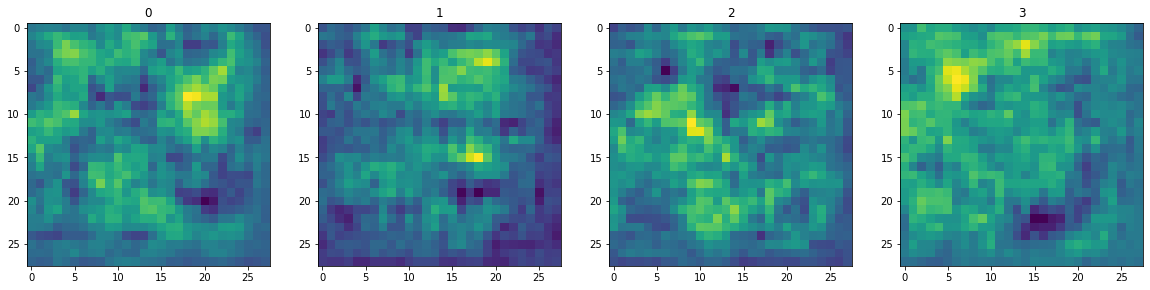

In [24]:
#Set up subplot formatting
img = generator.predict(np.random.randn(4,128,1))
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(img):
  ax[idx].imshow(np.squeeze(image))
  ax[idx].title.set_text(idx)

In [25]:
img.shape

(4, 28, 28, 1)

### Build Discrimenator

In [26]:
def build_Discriminator():
  model = Sequential()
  
  # First Conv Block
  model.add(Conv2D(32,5,input_shape = (28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Second Conv Block
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Thrird Conv Block
  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))  
  #Forth Conv Block
  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Flatten then pass to ense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))
  #0--> true img ; 1--> False img


  return model

In [27]:
discriminator = build_Discriminator()

In [28]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [29]:
img.shape

(4, 28, 28, 1)

In [30]:
image.shape

(28, 28, 1)

In [31]:
discriminator.predict(img)

1/1 [==============================] - 0s 169ms/step


array([[0.50242823],
       [0.502474  ],
       [0.5023558 ],
       [0.502624  ]], dtype=float32)

## Construct Training Loop

### Setup Losses and Opimizers

In [32]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [33]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
# these no. are random and needed to be played with to get optimum no.

g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()


### Build Subclassed Model

In [34]:
# Importing base model class to subclass our training step
from tensorflow.keras.models import Model

In [56]:
class FashionGAN(Model):
  def __init__(self, generator, discriminator, *args, **kwargs):
    # pass thorugh args and kwargs to our base model
    super().__init__(*args, **kwargs)

    # create attribtes for gen and disc
    self.generator = generator
    self.discriminator = discriminator
    
  def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
    # Compile with base class
    super().compile(*args, **kwargs)

    # Create attribute for losses and optimizers
    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss
    




  # This method is called when we call .fil method
  def train_step(self,batch):
    # get data
    real_images = batch
    fake_images = self.generator(tf.random.normal((128,128,1)), training = False)
  # def test_step(self): to run an evaulation funtion
    # Tain the discriminator
    with tf.GradientTape() as d_tape:
      # Pass the real and fake images to the discrminator model

      #Taking real images and passing through the discriminator
      #Training = True will activate the dropout layer
      yhat_real = self.discriminator(real_images, training = True)

      #Passing the fake images to te dicsciminator
      yhat_fake = self.discriminator(fake_images, training = True)

      #Combining both the results
      yhat_realfake = tf.concat([yhat_real, yhat_fake], axis = 0)


      # Create labels real and fake images
      y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis = 0)
      

      # Add some noise to the output (so discrminator doesn't learn too fast for generator to cope-up)
      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      # Adding -ve noise to the 1's
      noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake += tf.concat([noise_real, noise_fake],axis=0)

      # Calculate Losses - BINARYCROSS
      total_d_loss = self.d_loss(y_realfake, yhat_realfake)


    # Apply backpropogation - nn learn
    dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))



    # Train the Generator 
    with tf.GradientTape() as g_tape:
      # Generate some new target
      gen_image = self.generator(tf.random.normal((128,128,1)), training = True)
      
      # Create the predicted labels
      # We don't wnat our discriminator to be learning while setting up our generator
      predicted_labels = self.discriminator(gen_image, training = False) 

      # Calculate loss
      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)
      # We know tha our discriminator gives 0--> real images(what disc. thinks)
      # So we would reward our generator whenever we get a 0 for an generated image

    # Apply backpropogation
    ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))


    return {"d_loss":total_d_loss, "g_loss":total_g_loss}


In [57]:
# tf.random.normal((6,128,1))

In [58]:
# Create instance of our subclass model
fashgan = FashionGAN(generator,discriminator)


In [59]:
print(type(fashgan))
print(type(generator))
print(type(discriminator))

<class '__main__.FashionGAN'>
<class 'keras.engine.sequential.Sequential'>
<class 'keras.engine.sequential.Sequential'>


In [60]:
#Compile the model
# this is the point where we see weather our shit actually works or not
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

### Build Callback

In [61]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback


In [62]:
# Create a folder named images in your root directory
img_try = tf.random.uniform((28,28,1))
img_try *= 255
img_try.numpy()
img_try2 =array_to_img(img_try)
img_try2.save(os.path.join('images', 'generated_img_trial.png'))

In [66]:
# Opitional just makes it easier to visualize the generator of images and monitoring the model during training
class ModelMonitor(Callback):
  def __init__(self, num_img=3, latent_dim=128):
    self.num_img = num_img
    self.latent_dim = latent_dim

  def on_epoch_end(self, epoch, logs=None):
    random_latent_vector =tf.random.uniform((self.num_img, self.latent_dim, 1))
    generated_images = self.model.generator(random_latent_vector)
    generated_images *= 255
    generated_images.numpy()

    for i in range(self.num_img):
      img = array_to_img(generated_images[i])
      img.save(os.path.join('images', f'generated_img{epoch}_{i}.png'))


### Train

In [67]:
ds.as_numpy_iterator().next().shape  

(128, 28, 28, 1)

In [68]:
# Reconmended 2000 epoches

# For monitoring model via Callback
hist = fashgan.fit(ds, epochs=20, callbacks=[ModelMonitor()])

## Cross your fingers

Epoch 1/20
  6/469 [..............................] - ETA: 1:06 - d_loss: 0.2969 - g_loss: 4.9678

469/469 [==============================] - 67s 143ms/step - d_loss: 0.2852 - g_loss: 5.1035
Epoch 2/20
469/469 [==============================] - 68s 145ms/step - d_loss: 0.2768 - g_loss: 5.0569
Epoch 3/20
469/469 [==============================] - 69s 147ms/step - d_loss: 0.2746 - g_loss: 4.8261
Epoch 4/20
469/469 [==============================] - 69s 148ms/step - d_loss: 0.2732 - g_loss: 4.5786
Epoch 5/20
469/469 [==============================] - 70s 150ms/step - d_loss: 0.2715 - g_loss: 4.3793
Epoch 6/20
469/469 [==============================] - 71s 152ms/step - d_loss: 0.2707 - g_loss: 4.2118
Epoch 7/20
469/469 [==============================] - 72s 154ms/step - d_loss: 0.2704 - g_loss: 4.0249
Epoch 8/20
469/469 [==============================] - 72s 153ms/step - d_loss: 0.2700 - g_loss: 3.8444
Epoch 9/20
469/469 [==============================] - 72s 153ms/step - d_loss: 0.2693 - g_loss: 3.6903
Epoch 10/20
469/469 [==============================] - 71s 152ms/step - d_loss: 0.26

KeyboardInterrupt: ignored

### Review Performance

In [69]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

NameError: ignored

<Figure size 432x288 with 0 Axes>

### Save Model

In [ ]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')

## Test Out Generator

### Generate Image

In [76]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))

1/1 [==============================] - 0s 177ms/step


In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])